<a href="https://colab.research.google.com/github/Monisha2604/Final_Year_Project/blob/master/RF_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Final_project_processed_data.csv')

In [ ]:
data

,Unnamed: 0,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,dered_u,dered_g,dered_r,dered_i,dered_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroR50_r,petroR50_z,petroR90_r,petroR90_z,r,i,z,redshift
0,0,24.35021,22.78955,22.03197,21.07172,21.22284,24.85709,21.12559,20.30777,19.25670,19.64961,23.45947,22.21595,21.79943,20.82268,20.63929,3.463256,1.221438,5.318553,3.343638,20.38345,19.31294,19.69144,0.816274
1,1,24.47392,22.43417,20.73903,19.74737,19.26174,24.28020,21.56639,19.91743,18.95574,18.52003,23.65456,22.58490,20.85625,19.90601,19.45691,1.782849,1.586178,6.192710,4.988663,19.99389,19.01255,18.56230,0.556475
2,2,23.38084,22.54274,21.59399,20.49164,20.02670,22.31751,21.26557,20.37567,19.42218,19.13447,23.18704,22.33743,21.35546,20.38862,20.05538,1.380345,2.446029,2.703028,4.893902,20.47651,19.49712,19.19021,0.619608
3,3,24.72258,22.71763,20.91958,20.06721,19.74904,24.47891,21.86707,20.02602,19.16190,18.81230,25.56193,22.43001,20.78630,20.05370,19.60366,1.569348,1.792469,6.201793,8.331386,20.13745,19.24470,18.87388,0.461181
4,4,25.22490,24.46752,21.76405,20.69007,19.97592,26.23128,23.61348,20.46305,19.37706,18.63556,25.20392,23.63432,21.81574,20.69833,19.95681,1.762722,2.094598,3.480688,4.283308,20.52637,19.42410,18.67056,0.642172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441895,2499995,24.25570,23.01099,21.23196,20.30472,19.93614,23.31473,21.78997,20.02522,19.13366,18.76199,24.47870,23.11604,21.44318,20.50772,20.17090,1.639935,1.505080,3.582559,2.904573,20.20885,19.27012,18.86349,0.577636
2441896,2499996,22.74953,20.92413,20.47596,20.49193,20.28576,22.55029,20.75138,20.35955,20.40362,20.20701,22.77330,21.31367,20.80185,20.79133,20.55892,0.789819,0.704238,1.714250,1.432922,20.47752,20.49128,20.27222,3.374991
2441897,2499997,23.43518,24.22807,22.15212,21.01483,20.16220,23.13518,24.03269,21.56787,20.50004,19.74846,23.43972,24.25535,22.35298,21.17685,20.37539,1.261137,1.045210,3.583881,6.687465,21.62790,20.54465,19.78164,0.693724
2441898,2499998,21.57994,21.33937,21.00875,20.89020,20.99512,21.23898,21.05072,20.80949,20.74134,20.87878,22.11382,21.68848,21.41005,21.24844,21.49399,0.869942,0.046646,2.231194,0.076052,21.01353,20.89297,20.99157,1.507465


In [ ]:
X = data.drop("redshift",axis=1)   #Feature Matrix
y = data["redshift"]

In [ ]:
type(X),X

(pandas.core.frame.DataFrame,
          psfMag_u  psfMag_g  psfMag_r  ...         r         i         z
 0        24.35021  22.78955  22.03197  ...  20.38345  19.31294  19.69144
 1        24.47392  22.43417  20.73903  ...  19.99389  19.01255  18.56230
 2        23.38084  22.54274  21.59399  ...  20.47651  19.49712  19.19021
 3        24.72258  22.71763  20.91958  ...  20.13745  19.24470  18.87388
 4        25.22490  24.46752  21.76405  ...  20.52637  19.42410  18.67056
 ...           ...       ...       ...  ...       ...       ...       ...
 2440745  24.25570  23.01099  21.23196  ...  20.20885  19.27012  18.86349
 2440746  22.74953  20.92413  20.47596  ...  20.47752  20.49128  20.27222
 2440747  23.43518  24.22807  22.15212  ...  21.62790  20.54465  19.78164
 2440748  21.57994  21.33937  21.00875  ...  21.01353  20.89297  20.99157
 2440749  21.82280  21.38213  21.43386  ...  21.31424  20.75324  20.78646
 
 [2440750 rows x 18 columns])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
X_train.shape

(1953520, 23)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
import time 

start=time.process_time()
regressor.fit(X_train, y_train) 
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))



Program Executed in minutes 20.811263093866668


In [ ]:
Y_pred=regressor.predict(X_test)

In [ ]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test,Y_pred)) 

0.14813881890183778


In [ ]:
print(metrics.mean_squared_error(y_test,Y_pred)) 

0.15615664204074545


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

0.39516660036084206


In [ ]:
from sklearn import metrics
print(metrics.r2_score(y_test,Y_pred))

0.707543993108593


In [ ]:
len(y_train),len(Y_pred)

(1952600, 488150)

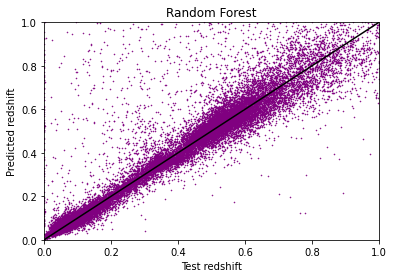

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Random Forest")
plt.scatter(y_test[:30000], Y_pred[:30000], s=0.30, color="purple")
ax1.set_xlabel("Test redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,1], [0,1], '-r',color="black")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

    
plt.show()